In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from keras import initializers
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import random
import keras.backend as K
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

2024-05-17 18:04:37.221108: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 18:04:37.221228: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 18:04:37.392441: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [4]:
df = pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [5]:
df.shape

(19219, 35)

In [6]:
df = df.drop('id', axis=1)

In [7]:
print("Attribute: ", df.shape[1] - 7)
print("Instances: ", df.shape[0])

Attribute:  27
Instances:  19219


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              19219 non-null  int64  
 1   X_Maximum              19219 non-null  int64  
 2   Y_Minimum              19219 non-null  int64  
 3   Y_Maximum              19219 non-null  int64  
 4   Pixels_Areas           19219 non-null  int64  
 5   X_Perimeter            19219 non-null  int64  
 6   Y_Perimeter            19219 non-null  int64  
 7   Sum_of_Luminosity      19219 non-null  int64  
 8   Minimum_of_Luminosity  19219 non-null  int64  
 9   Maximum_of_Luminosity  19219 non-null  int64  
 10  Length_of_Conveyer     19219 non-null  int64  
 11  TypeOfSteel_A300       19219 non-null  int64  
 12  TypeOfSteel_A400       19219 non-null  int64  
 13  Steel_Plate_Thickness  19219 non-null  int64  
 14  Edges_Index            19219 non-null  float64
 15  Em

In [9]:
df.iloc[:,:27].describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,...,0.030609,0.614749,0.831652,0.591899,2.473475,1.312667,1.389737,0.102742,-0.138382,0.571902
std,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,...,0.047302,0.222391,0.220966,0.482050,0.760575,0.467848,0.405549,0.487681,0.120344,0.332219
min,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,...,0.001500,0.014400,0.105000,0.000000,0.778200,0.301000,0.000000,-0.988400,-0.885000,0.119000
25%,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,...,0.006600,0.451600,0.655200,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192500,0.253200
50%,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,...,0.009500,0.636400,0.964300,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900
75%,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,...,0.019100,0.785700,1.000000,1.000000,2.814900,1.431400,1.707600,0.529400,-0.084000,0.999400
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,...,0.665100,1.000000,1.000000,1.000000,4.554300,2.997300,4.033300,0.991700,0.642100,1.000000


In [10]:
features = df.iloc[:, 0:27].columns

In [11]:
features

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

In [12]:
features2=df.drop(columns=['Y_Minimum', 'Y_Maximum', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']).columns

In [13]:
features2

Index(['X_Minimum', 'X_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter',
       'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity',
       'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
       'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index',
       'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
       'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas'],
      dtype='object')

In [14]:
features3=df.drop(columns=['Y_Minimum', 'Y_Maximum', 'X_Perimeter', 'Y_Perimeter', 'Luminosity_Index', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']).columns

In [15]:
features3

Index(['X_Minimum', 'X_Maximum', 'Pixels_Areas', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'SigmoidOfAreas'],
      dtype='object')

In [16]:
labels =  df.iloc[:, 27:34].columns

In [17]:
labels

Index(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'],
      dtype='object')

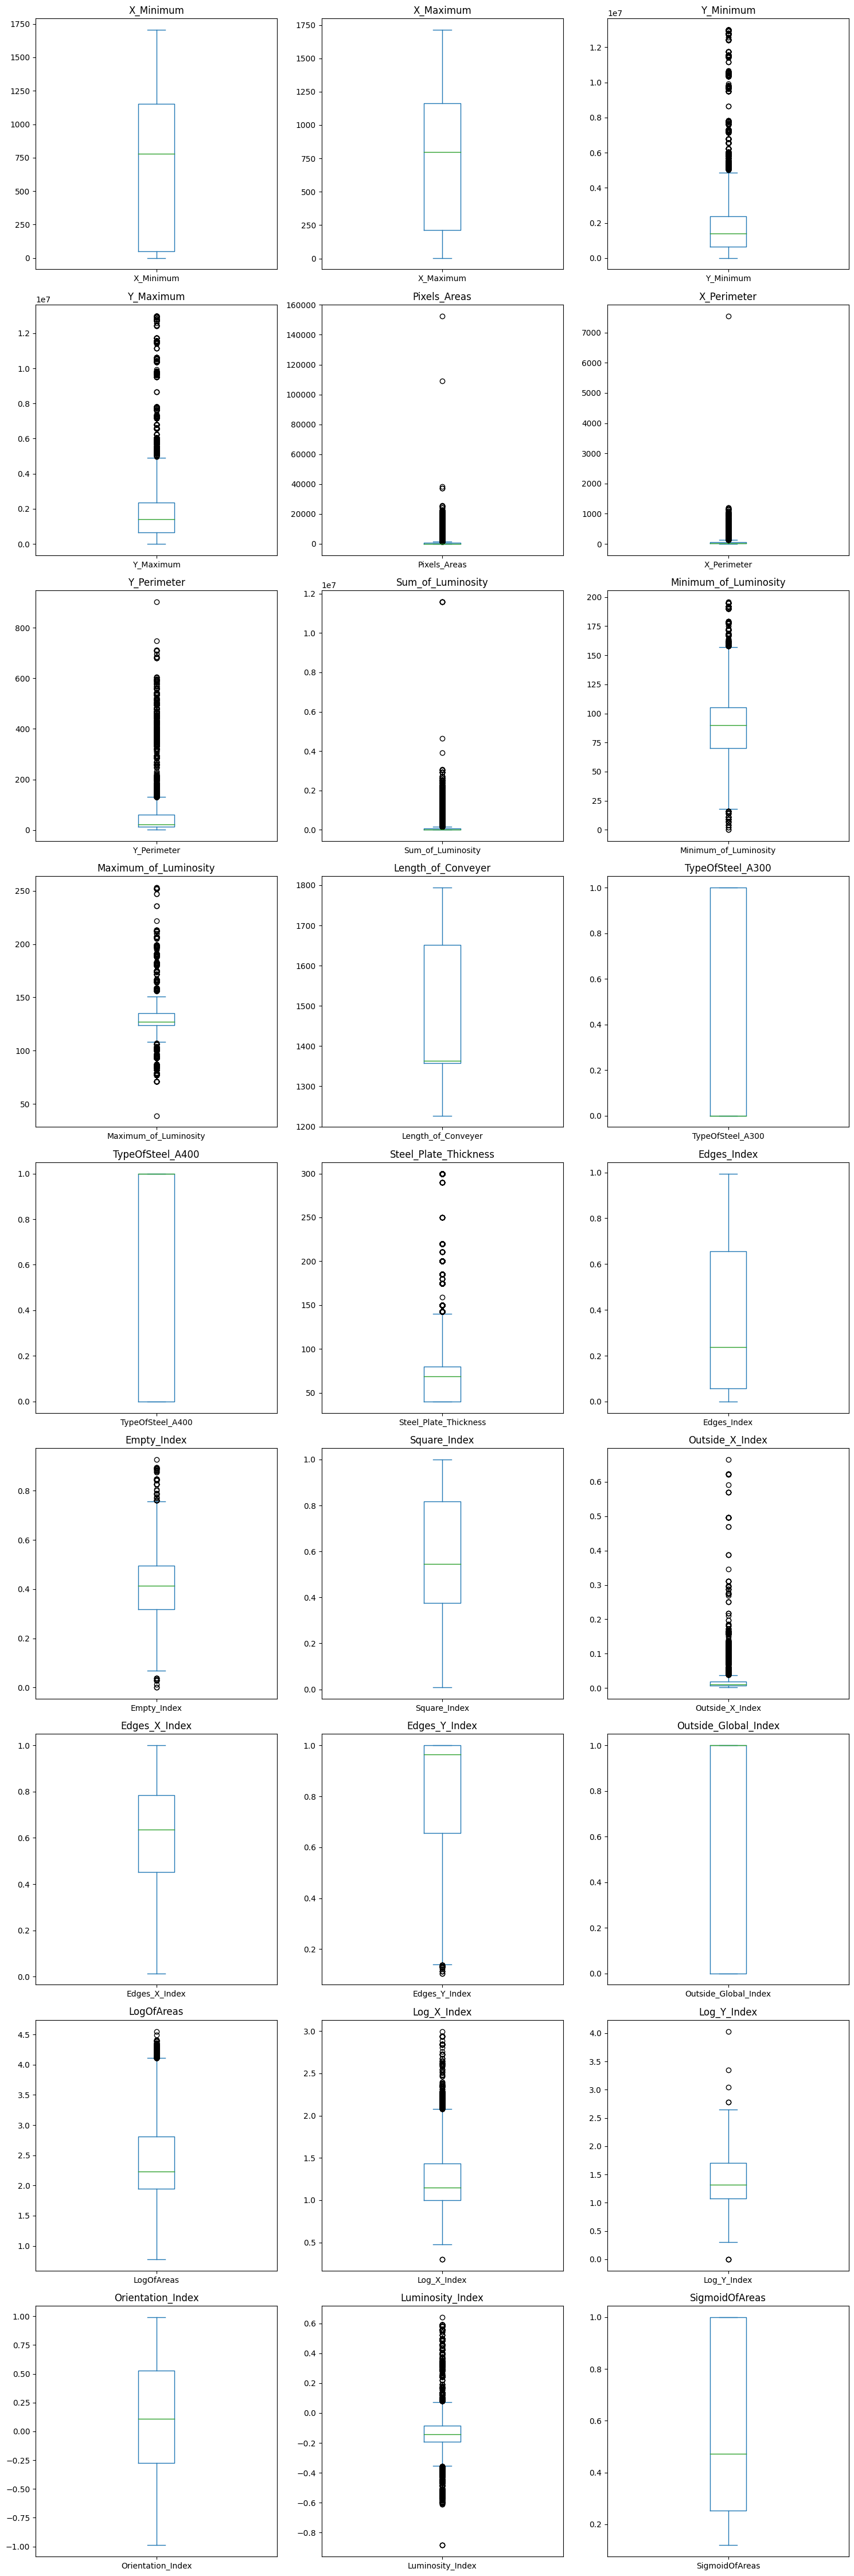

In [18]:
columns_to_plot = df.columns[:27]

fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(15, 45))
axes = axes.flatten()  

for i, column in enumerate(columns_to_plot):
    ax = axes[i]  
    df[column].plot(kind='box', ax=ax)
    ax.set_title(column)  
    ax.set_xlabel('') 
    
plt.tight_layout()
plt.show()

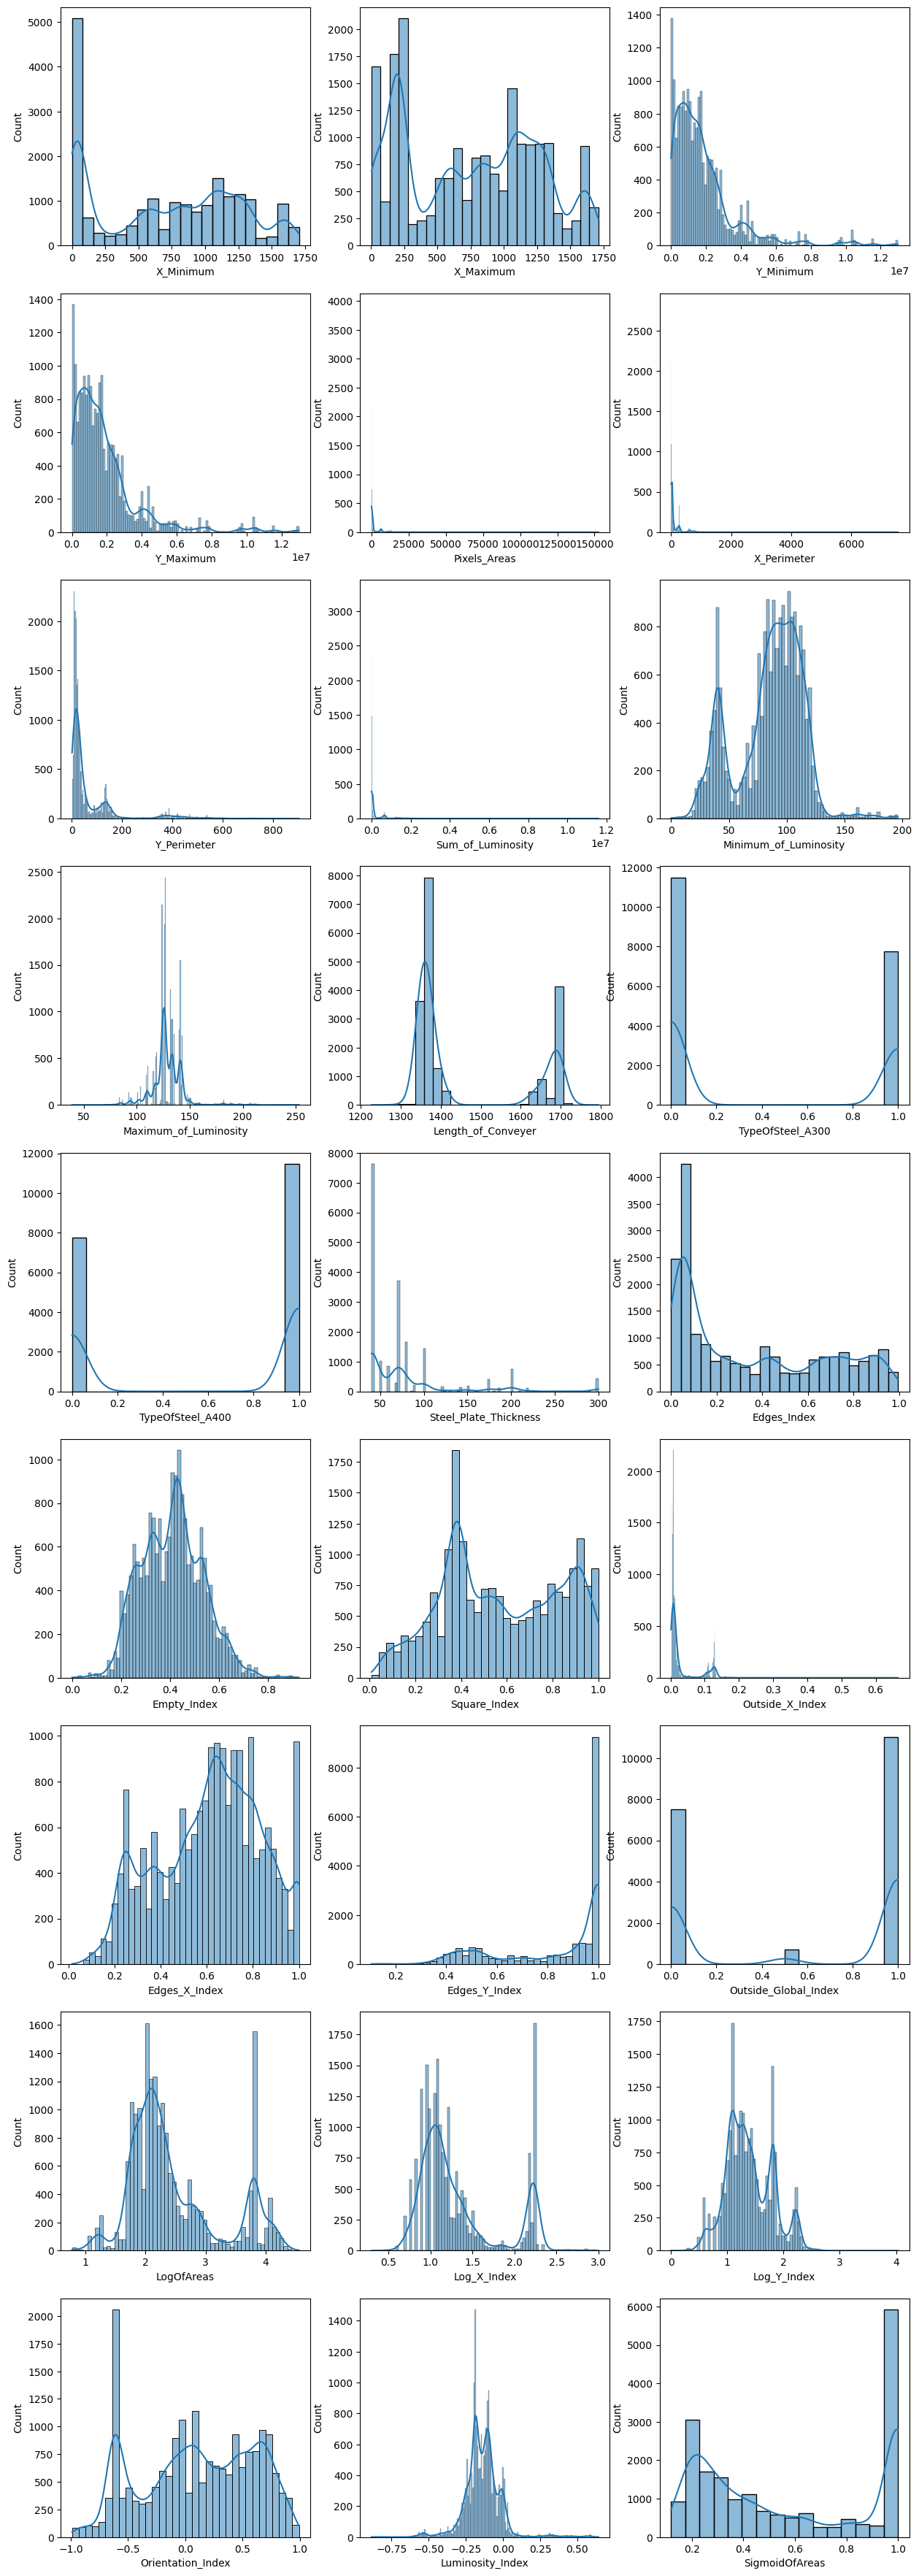

In [19]:
plt.figure(figsize=(15,45))
for i in range(27):
    plt.subplot(9,3,i+1)
    sns.histplot(data= df, x=features[i], kde=True )
#     plt.title(features_cols[i])
plt.show()

In [20]:
def correlation_matrix(df_subset):
    fig = plt.figure(figsize=(20, 25))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)  
    sns.heatmap(df_subset.corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
    plt.title('Correlation Matrix of First 27 Columns\n', fontsize=15)
    plt.xticks(fontsize=9, rotation=45)
    plt.yticks(fontsize=9)
    plt.show()

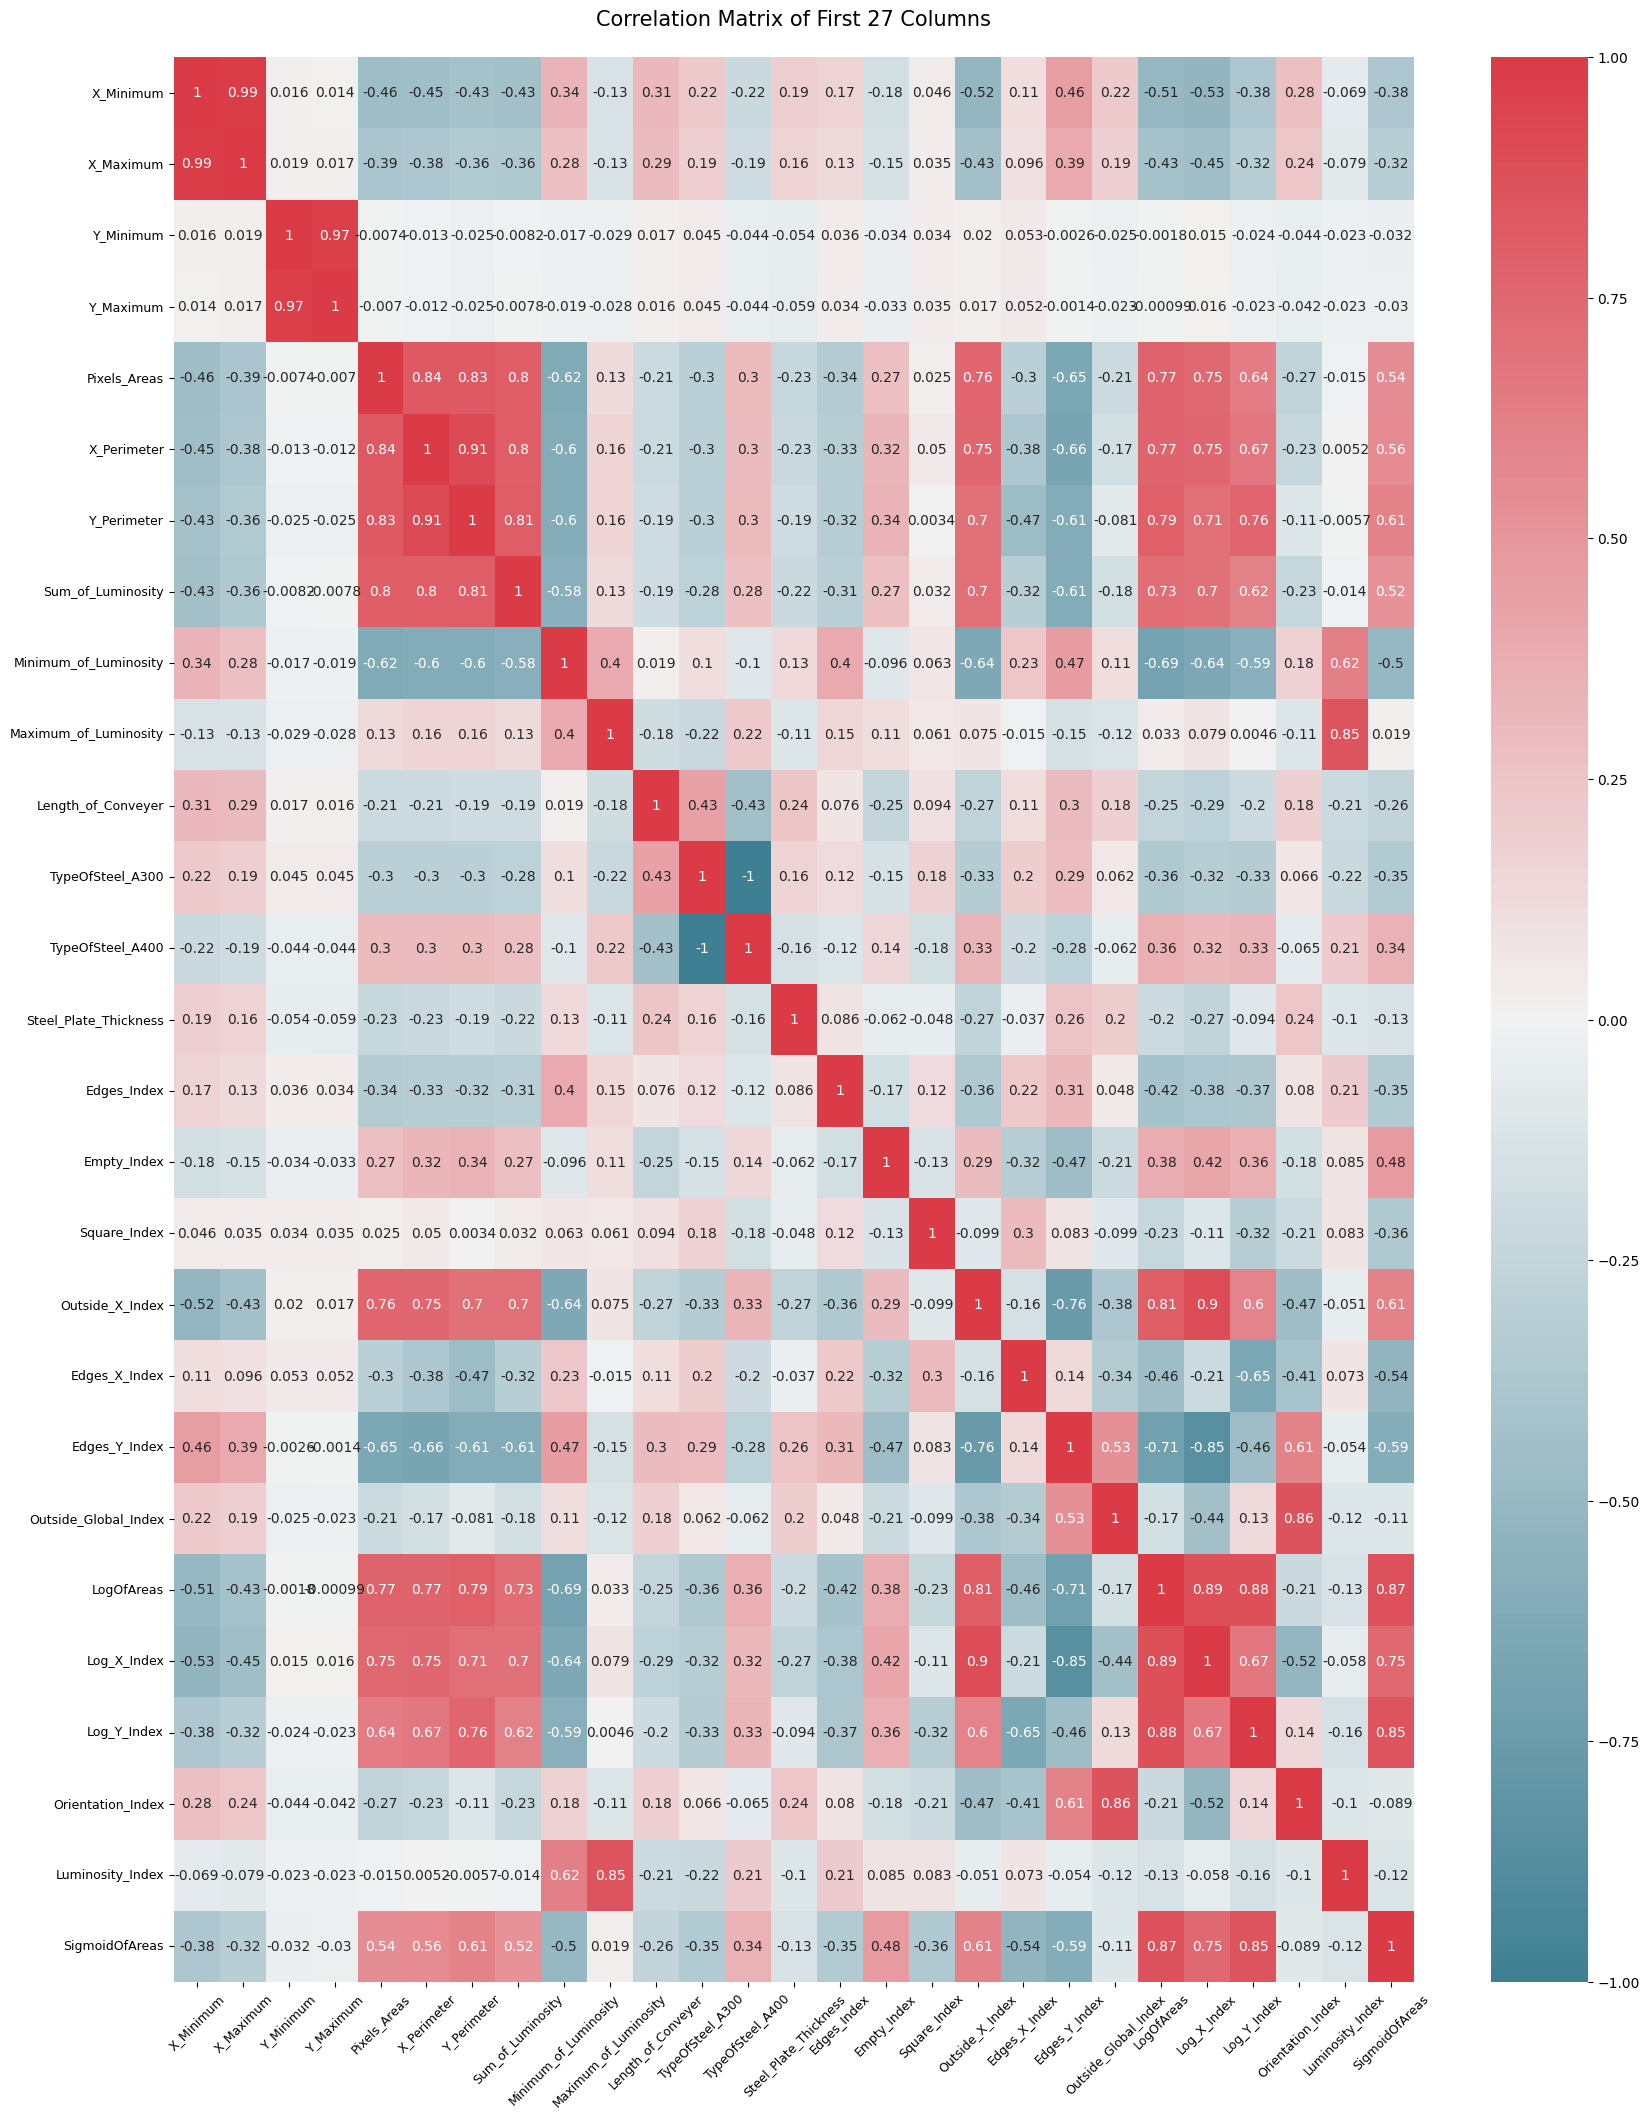

In [21]:
columns_to_analyze = df.columns[:27]  
df_subset = df[columns_to_analyze]

correlation_matrix(df_subset)

In [22]:
X = df[features]
y = df[labels]

In [23]:
X

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,584,590,909972,909977,16,8,5,2274,113,140,...,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,...,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901
19215,723,735,2488529,2488541,231,17,26,27135,104,133,...,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378
19216,6,31,1578055,1578129,780,114,98,71112,41,94,...,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997
19217,9,18,1713172,1713184,126,13,26,14808,88,132,...,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509


In [24]:
X2 = df[features2]

In [25]:
X2

,X_Minimum,X_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,584,590,16,8,5,2274,113,140,1358,0,...,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417
1,808,816,433,20,54,44478,70,111,1687,1,...,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491
2,39,192,11388,705,420,1311391,29,141,1400,0,...,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000
3,781,789,210,16,29,3202,114,134,1387,0,...,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025
4,1540,1560,521,72,67,48231,82,111,1692,0,...,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,17,4,4,2193,122,140,1360,0,...,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901
19215,723,735,231,17,26,27135,104,133,1652,1,...,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378
19216,6,31,780,114,98,71112,41,94,1358,0,...,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997
19217,9,18,126,13,26,14808,88,132,1692,1,...,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509


In [26]:
X3 = df[features3]

In [27]:
X3

,X_Minimum,X_Maximum,Pixels_Areas,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,...,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,SigmoidOfAreas
0,584,590,16,2274,113,140,1358,0,1,50,...,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,0.1417
1,808,816,433,44478,70,111,1687,1,0,80,...,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,0.9491
2,39,192,11388,1311391,29,141,1400,0,1,40,...,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,1.0000
3,781,789,210,3202,114,134,1387,0,1,40,...,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,0.4025
4,1540,1560,521,48231,82,111,1692,0,1,300,...,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,17,2193,122,140,1360,0,0,50,...,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.2901
19215,723,735,231,27135,104,133,1652,1,0,70,...,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,0.5378
19216,6,31,780,71112,41,94,1358,0,1,200,...,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,0.9997
19217,9,18,126,14808,88,132,1692,1,0,60,...,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,0.3509


In [28]:
scaler = RobustScaler()

In [29]:
X = scaler.fit_transform(X)

In [30]:
X2 = scaler.fit_transform(X2)

In [31]:
X3 = scaler.fit_transform(X3)

In [32]:
x_train, x_val, y_train,y_val = train_test_split(X,y, test_size=0.2, random_state=40)

In [33]:
x_train2, x_val2, y_train2, y_val2 = train_test_split(X2,y, test_size=0.2, random_state=40)

In [34]:
x_train3, x_val3, y_train3, y_val3 = train_test_split(X3,y, test_size=0.2, random_state=40)

In [35]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(15375, 27)
(3844, 27)
(15375, 7)
(3844, 7)


In [36]:
print(x_train2.shape)
print(x_val2.shape)
print(y_train2.shape)
print(y_val2.shape)

(15375, 25)
(3844, 25)
(15375, 7)
(3844, 7)


In [37]:
print(x_train3.shape)
print(x_val3.shape)
print(y_train3.shape)
print(y_val3.shape)

(15375, 22)
(3844, 22)
(15375, 7)
(3844, 7)


In [38]:
network = Sequential()
network.add(Dense(27, activation=None, input_shape=(27,)))
network.add(Dense(60, activation='relu'))
network.add(Dense(30, activation='relu'))
network.add(Dense(20, activation='relu'))
network.add(Dense(15, activation='relu'))
network.add(Dense(10, activation='relu' ))
network.add(Dense(5, activation='relu'))
network.add(Dense(30, activation='relu'))
network.add(Dense(7, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
network2 = Sequential()
network2.add(Dense(27, activation=None, input_shape=(25,)))
network2.add(Dense(60, activation='relu'))
network2.add(Dense(30, activation='relu'))
network2.add(Dense(20, activation='relu'))
network2.add(Dense(15, activation='relu'))
network2.add(Dense(10, activation='relu' ))
network2.add(Dense(5, activation='relu'))
network2.add(Dense(30, activation='relu'))
network2.add(Dense(7, activation='sigmoid'))

In [40]:
network3 = Sequential()
network3.add(Dense(27, activation=None, input_shape=(22,)))
network3.add(Dense(60, activation='relu'))
network3.add(Dense(30, activation='relu'))
network3.add(Dense(20, activation='relu'))
network3.add(Dense(15, activation='relu'))
network3.add(Dense(10, activation='relu' ))
network3.add(Dense(5, activation='relu'))
network3.add(Dense(30, activation='relu'))
network3.add(Dense(7, activation='sigmoid'))

In [41]:
network.compile(optimizer = optimizers.Adagrad(learning_rate=0.1115), loss='binary_crossentropy')

In [42]:
network2.compile(optimizer = optimizers.Adam(learning_rate=0.000115), loss='binary_crossentropy')

In [43]:
network3.compile(optimizer = optimizers.Adagrad(learning_rate=0.1115), loss='binary_crossentropy')

In [44]:
history = network.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=60, batch_size=30)

Epoch 1/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3723 - val_loss: 0.2924
Epoch 2/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2762 - val_loss: 0.2717
Epoch 3/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2657 - val_loss: 0.2669
Epoch 4/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2612 - val_loss: 0.2617
Epoch 5/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2564 - val_loss: 0.2582
Epoch 6/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2519 - val_loss: 0.2549
Epoch 7/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2504 - val_loss: 0.2488
Epoch 8/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2457 - val_loss: 0.2521
Epoch 9/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2426 - val_loss: 0.2522
Epoch 10/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2432 - val_loss: 0.2462
Epoch 11/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2409 - val_loss: 0.2503
Epoch 12/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [45]:
history2 = network2.fit(x_train2, y_train2, validation_data=(x_val2, y_val2), epochs=60, batch_size=30)

Epoch 1/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6081 - val_loss: 0.3626
Epoch 2/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3531 - val_loss: 0.3160
Epoch 3/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2991 - val_loss: 0.2842
Epoch 4/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2783 - val_loss: 0.2761
Epoch 5/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2707 - val_loss: 0.2718
Epoch 6/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2682 - val_loss: 0.2691
Epoch 7/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2642 - val_loss: 0.2669
Epoch 8/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2611 - val_loss: 0.2640
Epoch 9/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2601 - val_loss: 0.2635
Epoch 10/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2604 - val_loss: 0.2611
Epoch 11/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2565 - val_loss: 0.2591
Epoch 12/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [46]:
history3 = network3.fit(x_train3, y_train3, validation_data=(x_val3, y_val3), epochs=60, batch_size=30)

Epoch 1/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3412 - val_loss: 0.2773
Epoch 2/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2710 - val_loss: 0.2691
Epoch 3/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2647 - val_loss: 0.2627
Epoch 4/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2589 - val_loss: 0.2588
Epoch 5/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2518 - val_loss: 0.2512
Epoch 6/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2456 - val_loss: 0.2467
Epoch 7/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2412 - val_loss: 0.2399
Epoch 8/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2390 - val_loss: 0.2394
Epoch 9/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2392 - val_loss: 0.2363
Epoch 10/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2334 - val_loss: 0.2385
Epoch 11/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2346 - val_loss: 0.2382
Epoch 12/60
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [47]:
test_dataset = pd.read_csv('/kaggle/input/playground-series-s4e3/test.csv', index_col='id')

In [48]:
test_dataset = test_dataset.drop(['Y_Minimum', 'Y_Maximum', 'X_Perimeter', 'Y_Perimeter', 'Luminosity_Index'], axis=1)

In [49]:
test_dataset

,X_Minimum,X_Maximum,Pixels_Areas,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,...,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,SigmoidOfAreas
id,,,,,,,,,,,,,,,,,,,,,
19219,1015,1033,659,62357,67,127,1656,0,1,150,...,0.3273,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,0.9172
19220,1257,1271,370,39293,92,132,1354,0,1,40,...,0.0938,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,0.9104
19221,1358,1372,289,29386,101,134,1360,0,1,40,...,0.4762,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,0.6514
19222,158,168,80,8586,107,140,1690,1,0,100,...,0.8182,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,0.2051
19223,559,592,140,15524,103,134,1688,1,0,60,...,0.4286,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,0.4170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32028,1101,1116,313,21603,79,103,1353,0,1,70,...,0.2339,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,0.8894
32029,1289,1306,59,5249,113,141,1362,0,1,40,...,0.2778,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,0.1954
32030,41,210,16584,1858162,24,143,1400,0,1,40,...,0.9371,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,1.0000


In [50]:
print(test_dataset.shape)

(12814, 22)


In [51]:
test_data = scaler.transform(test_dataset)

In [52]:
prediction = network.predict(x_val)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [53]:
prediction2 = network2.predict(x_val2)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [54]:
prediction3 = network3.predict(x_val3)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [55]:
prediction

array([[1.43308127e-02, 1.50053855e-02, 1.12652760e-02, ...,
        8.71346518e-03, 4.97108668e-01, 4.28276807e-01],
       [3.58693040e-04, 8.09696394e-06, 9.69376922e-01, ...,
        1.42214587e-04, 2.63136200e-04, 5.70086800e-02],
       [1.48968380e-02, 6.94940746e-01, 3.64213157e-03, ...,
        3.47809517e-03, 6.73525184e-02, 1.93963721e-01],
       ...,
       [2.08061203e-01, 1.52170798e-03, 8.95760313e-04, ...,
        1.22767501e-02, 8.71537328e-02, 6.12235606e-01],
       [4.11171794e-01, 1.94069158e-04, 5.12180501e-04, ...,
        1.75444614e-02, 1.92260921e-01, 3.48031312e-01],
       [4.13558213e-03, 1.03270607e-02, 9.12808580e-04, ...,
        2.99827056e-03, 1.02265989e-02, 1.85563087e-01]], dtype=float32)

In [56]:
prediction2

array([[5.3108484e-02, 4.4624959e-03, 3.0248996e-04, ..., 4.4500059e-03,
        5.7608229e-01, 3.3204314e-01],
       [2.7709780e-06, 1.5730619e-03, 9.4057441e-01, ..., 9.2668146e-05,
        3.4334147e-03, 5.6803018e-02],
       [5.9050128e-02, 2.4355721e-01, 1.0175220e-01, ..., 6.5536454e-02,
        2.6099777e-01, 3.6745897e-01],
       ...,
       [2.0517148e-01, 1.2436960e-04, 1.9733526e-03, ..., 1.3859419e-02,
        1.0611808e-01, 6.7232180e-01],
       [2.1937764e-01, 1.3259030e-03, 9.6081366e-04, ..., 2.8584415e-02,
        3.1586471e-01, 3.5872692e-01],
       [1.3149705e-02, 2.6269739e-05, 1.5219035e-02, ..., 1.8322265e-02,
        3.2992411e-02, 1.9925916e-01]], dtype=float32)

In [57]:
prediction3

array([[4.4866629e-02, 3.7554817e-03, 2.9825603e-04, ..., 2.5263869e-03,
        5.6179643e-01, 3.1467572e-01],
       [3.1400329e-04, 3.0113059e-05, 9.1190654e-01, ..., 1.3865231e-05,
        6.6250074e-04, 6.0490198e-02],
       [9.2092916e-02, 1.3822843e-01, 3.0152168e-04, ..., 5.7412162e-03,
        1.7264561e-01, 4.9716592e-01],
       ...,
       [3.1224486e-01, 1.3482230e-03, 4.2330814e-04, ..., 3.2616086e-02,
        5.0639123e-02, 5.6694984e-01],
       [3.2956567e-01, 6.9681281e-04, 1.2010074e-04, ..., 1.9199371e-03,
        4.6842277e-01, 2.9628438e-01],
       [3.3571895e-03, 3.2331183e-05, 3.1033080e-04, ..., 6.7714918e-03,
        2.9016297e-02, 2.7413720e-01]], dtype=float32)

ROC-AUC Score for Class Pastry: 0.8456
ROC-AUC Score for Class Z_Scratch: 0.9214
ROC-AUC Score for Class K_Scatch: 0.9762
ROC-AUC Score for Class Stains: 0.9586
ROC-AUC Score for Class Dirtiness: 0.8575
ROC-AUC Score for Class Bumps: 0.7793
ROC-AUC Score for Class Other_Faults: 0.6772


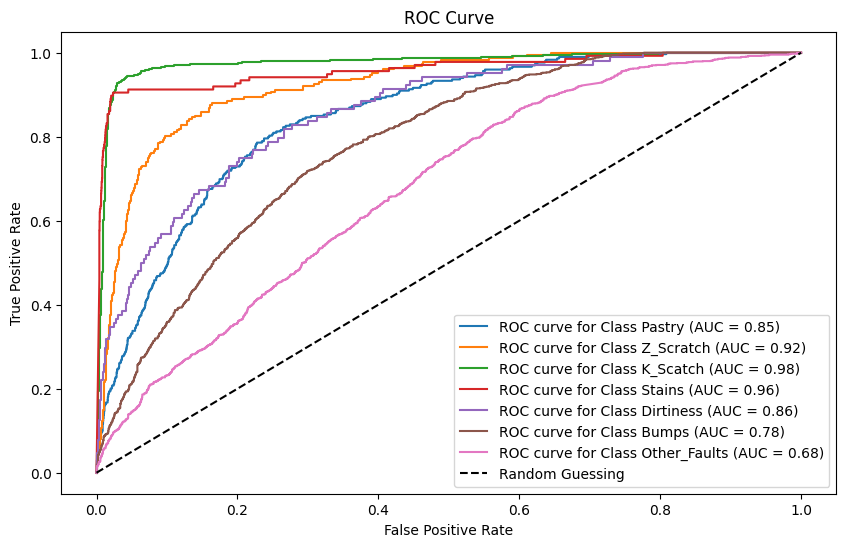

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(len(y_val.columns)):
    roc_auc = roc_auc_score(y_val.iloc[:, i], prediction[:, i])
    roc_auc_scores.append(roc_auc)
    print("ROC-AUC Score for Class {}: {:.4f}".format(y_val.columns[i], roc_auc))

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(y_val.columns)):
    fpr, tpr, _ = roc_curve(y_val.iloc[:, i], prediction[:, i])
    plt.plot(fpr, tpr, label='ROC curve for Class {} (AUC = {:.2f})'.format(y_val.columns[i], roc_auc_scores[i]))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [59]:
average_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print("Average ROC-AUC Score: {:.9f}".format(average_roc_auc))

Average ROC-AUC Score: 0.859411411


ROC-AUC Score for Class Pastry: 0.8493
ROC-AUC Score for Class Z_Scratch: 0.9228
ROC-AUC Score for Class K_Scatch: 0.9743
ROC-AUC Score for Class Stains: 0.9726
ROC-AUC Score for Class Dirtiness: 0.8651
ROC-AUC Score for Class Bumps: 0.7763
ROC-AUC Score for Class Other_Faults: 0.6843


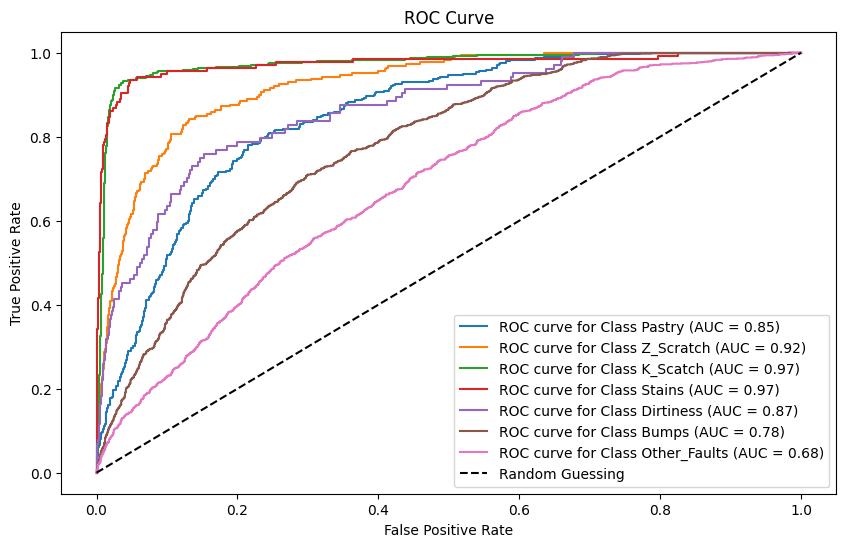

In [60]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC-AUC score for each class
roc_auc_scores2 = []
for i in range(len(y_val2.columns)):
    roc_auc2 = roc_auc_score(y_val2.iloc[:, i], prediction2[:, i])
    roc_auc_scores2.append(roc_auc2)
    print("ROC-AUC Score for Class {}: {:.4f}".format(y_val2.columns[i], roc_auc2))

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(y_val2.columns)):
    fpr, tpr, _ = roc_curve(y_val2.iloc[:, i], prediction2[:, i])
    plt.plot(fpr, tpr, label='ROC curve for Class {} (AUC = {:.2f})'.format(y_val2.columns[i], roc_auc_scores2[i]))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [61]:
average_roc_auc2 = sum(roc_auc_scores2) / len(roc_auc_scores2)
print("Average ROC-AUC Score: {:.9f}".format(average_roc_auc2))

Average ROC-AUC Score: 0.863542834


ROC-AUC Score for Class Pastry: 0.8566
ROC-AUC Score for Class Z_Scratch: 0.9355
ROC-AUC Score for Class K_Scatch: 0.9800
ROC-AUC Score for Class Stains: 0.9795
ROC-AUC Score for Class Dirtiness: 0.8775
ROC-AUC Score for Class Bumps: 0.7930
ROC-AUC Score for Class Other_Faults: 0.6807


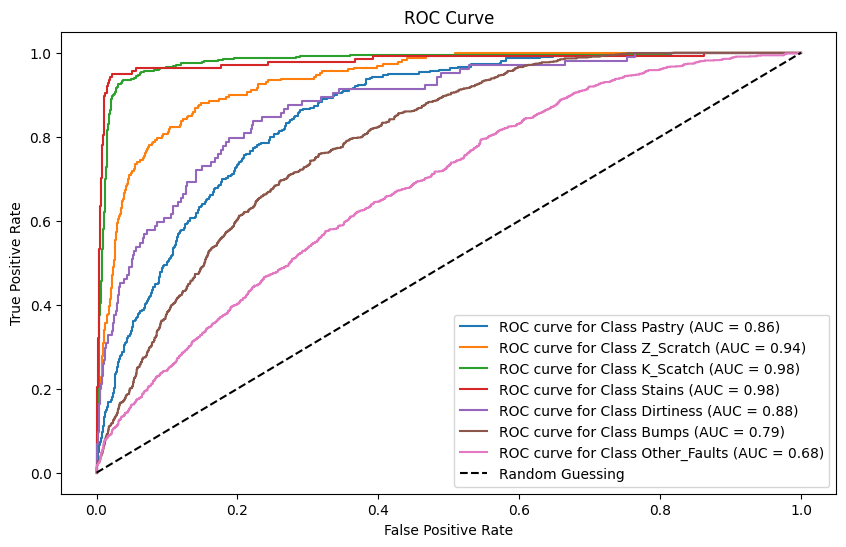

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC-AUC score for each class
roc_auc_scores3 = []
for i in range(len(y_val3.columns)):
    roc_auc3 = roc_auc_score(y_val3.iloc[:, i], prediction3[:, i])
    roc_auc_scores3.append(roc_auc3)
    print("ROC-AUC Score for Class {}: {:.4f}".format(y_val3.columns[i], roc_auc3))

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(y_val3.columns)):
    fpr, tpr, _ = roc_curve(y_val3.iloc[:, i], prediction3[:, i])
    plt.plot(fpr, tpr, label='ROC curve for Class {} (AUC = {:.2f})'.format(y_val3.columns[i], roc_auc_scores3[i]))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [63]:
average_roc_auc3 = sum(roc_auc_scores3) / len(roc_auc_scores3)
print("Average ROC-AUC Score: {:.9f}".format(average_roc_auc3))

Average ROC-AUC Score: 0.871836350


In [64]:
test_data_subset = test_data[:10]

predictions = network3.predict(test_data_subset)

print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[6.6008419e-01 8.1527740e-04 3.7030838e-04 6.9909061e-07 1.0992463e-02
  8.0911152e-02 2.5086755e-01]
 [4.0145788e-01 5.8340505e-03 9.6253771e-03 5.0364848e-04 2.6402703e-01
  3.5271883e-02 3.6065143e-01]
 [6.5991497e-03 6.3885741e-02 9.2857014e-03 1.1056360e-05 4.1521545e-03
  2.7586186e-01 5.5771762e-01]
 [1.4302444e-01 7.2302413e-04 1.4050177e-03 4.8984712e-06 9.6443621e-03
  4.9553788e-01 3.4498945e-01]
 [7.1087964e-03 1.2146635e-03 8.7799010e-04 9.8653209e-07 1.9174535e-03
  6.8986291e-01 3.6823764e-01]
 [4.7185753e-02 7.1426386e-01 6.9886149e-04 1.3566734e-05 2.7823376e-03
  7.2588690e-02 2.3350812e-01]
 [4.8627582e-01 2.9941993e-03 7.5317593e-04 6.6649905e-06 3.3181585e-02
  8.8040240e-02 3.6540961e-01]
 [7.0876703e-02 6.7240372e-02 9.6910918e-04 1.2645032e-05 1.3195368e-02
  1.9332974e-01 5.2167088e-01]
 [2.0701263e-02 6.2589154e-02 2.6849312e-01 1.5104797e-03 1.4560011e-02
  7.5792164e-02 4.2746446e-01]
 [2.6134920e-01 1.2138945e-02 1.479

In [65]:
id_data = pd.read_csv("/kaggle/input/playground-series-s4e3/test.csv")

In [66]:
result=np.round(network3.predict(test_data),6)

401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [67]:
submission = pd.DataFrame( result, columns=y.keys())
submission.insert(0, 'id', id_data['id']) 
submission.to_csv('submission.csv', index=False)

In [68]:
submission.shape

(12814, 8)